#Activation Function

## The sigmoid function

Mathematically, $$ f(x) = \frac{1}{1 + e^{-x}}$$

The value of this function lies between 0 and 1.

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

## The Tanh function

Mathematically, $$ f(x) = \frac{1 - e^{-2x}}{1 + e^{-2x}}$$

The value of this function lies between -1 and +1

In [3]:
def tanh(x):
  numerator = 1 - np.exp(-2*x)
  denominator = 1 + np.exp(-2*x)
  return numerator/denominator

## ReLU (Rectified Linear Unit) Function

Mathematically, $$f(x) = max(0, x)$$

The value of this function ranges from 0 to infinity.

In [ ]:
def ReLU(x):
  if x>0:
    return x
  return 0

## The Leaky ReLU Function
The Leaky ReLU (Rectified Linear Unit) is a variant of the ReLU activation function that addresses the "dying ReLU" problem by allowing a small gradient when the unit is not active. It is defined as:

$$f(x) = \begin{cases}
x, & \text{if } x \geq 0 \\
\alpha x, & \text{otherwise}
\end{cases}$$


In [4]:
def leakyReLU(x, alpha=0.01):
  if x < 0:
    return alpha*x
  return x

## The Exponential Linear Unit Function
It is defined as:
$$f(x) = \begin{cases}
x, & \text{if } x \geq 0 \\
\alpha \cdot (e^x - 1), & \text{otherwise}
\end{cases} $$

It has a small slope for negative values. It has a log curve.

In [5]:
def ELU(x, alpha=0.01):
  if x < 0:
    return (alpha * (np.exp(x) - 1))
  return x

## The Swish Function

Swish is a non-monotonic function, which means it is neither always non-increasing or non-decreasing.<br>

$$ f(x) = x \cdot \sigma(x) $$

It can be reparametrized as:
$$ f(x) = 2x \cdot \sigma(\beta x) $$

where:
- \( f(x) \) is the output of the Swish function for input \( x \).
- \( x \) is the input value.
- $\sigma(\cdot)$ is the sigmoid function, which is defined as $ \sigma(x) = \frac{1}{1 + e^{-x}} $.
- $ \beta $ is a hyperparameter that determines the slope of the function.

When $\beta = 0 $, the Swish function simplifies to $ f(x) = x $, and as $ \beta $ increases (tends to infinity), the function becomes $2 max(0,x) $, which is basically the ReLU function multiplied by some constant value. So, the value of $ \beta $ acts as a good interpolation between a linear and a non-linear function.

In [6]:
def swish(x, beta):
  return 2*x*sigmoid(beta*x)

## The softmax function



In [7]:
def softmax(x):
  return np.exp(x) / np.exp(x).sum(axis=0)

# Forward Propagation in ANN

In [10]:
def forward_prop(X, Wxh, Why):
  z1 = np.dot(X, Wxh) + bh
  a1 = sigmoid(z1)
  z2 = np.dot(a1, Why) + by
  y_hat = sigmoid(z2)

  return z1, a1, z2, y_hat

# Backward Propagation in ANN

In [19]:
def backward_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

# Building a neural network from scratch

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

### Preparing the data (XOR table)

In [13]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

### Defining the number of nodes in each layer

In [14]:
num_input = 2
num_hidden = 5
num_output = 1

### Initializing the weights and biases randomly

In [15]:
#Input layer to hidden layer weights
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

#Hidden layer to output layer
Why = np.random.randn(num_hidden,num_output)
by = np.zeros((1,num_output))

### Define the derivative of sigmoid function

In [16]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

### Define the cost function

In [17]:
def cost_function(y,y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

### Set the learning rate and the number of training iterations

In [18]:
alpha = 0.01
num_iterations = 5000

### Start Training

In [20]:
cost = []
for i in range(num_iterations):
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)

    #update weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy

    #compute cost
    c = cost_function(y,y_hat)

    cost.append(c)

### Plot the cost function

Text(0, 0.5, 'Cost')

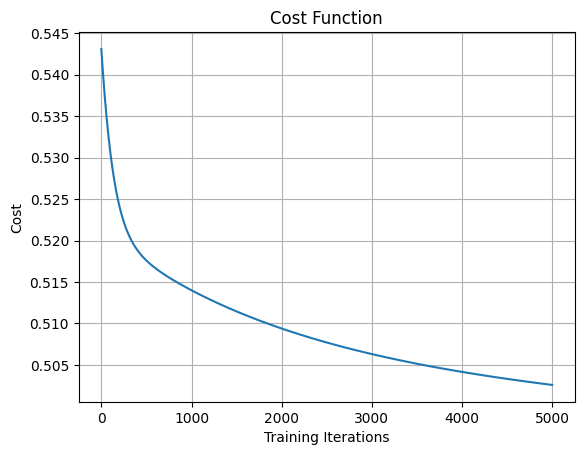

In [21]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')